# EDA

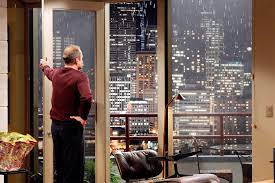

# First Project - Data Analysis


In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN
import plotly.express as px



from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (10, 8),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Question:

_Erin Robinson is a buyer who likes to invest in a poor neighborhood, buying and selling, cost backs + little profit, socially responsible_

She wants to buy old houses in the poor neighbourhood (cheap old houses) and wants to renovate them and cut extra costs (costs for only necessary changes) plus she wants to make a little profit after resale, also she wants to be socially responsible. This means her customers would be the one who looks for a lower price from the same neighbourhood.


In the data frame eda_details.csv they are columns with different data types such as yr_built, yr_renovated.
In the daframe eda_sales.csv there is one columns 'date' with different data type. So these columns should be changed to datatime format. Also, in both the data frames the id and house_id are primary keys so it should be merged using the inner join.

# df_details:

In [2]:
df_details= pd.read_csv('eda_details.csv')
df_details.head(10)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     1000102     6.000      3.000     2400.000  9373.000   2.000         NaN   
1   100100050     3.000      1.000     1320.000 11090.000   1.000       0.000   
2  1001200035     3.000      1.000     1350.000  7973.000   1.500         NaN   
3  1001200050     4.000      1.500     1260.000  7248.000   1.500         NaN   
4  1003000175     3.000      1.000      980.000  7606.000   1.000       0.000   
5   100300280     3.000      2.250     1430.000  4777.000   2.000       0.000   
6   100300500     3.000      2.500     1520.000  3041.000   2.000       0.000   
7   100300530     3.000      2.500     1520.000  3003.000   2.000       0.000   
8  1003400155     3.000      1.000     1100.000  7657.000   1.000       0.000   
9  1003400245     3.000      1.000     1130.000  9907.000   1.000       0.000   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0 0.000          3      7    2400.000          0.000      1991         0.000   
1 0.000          3      7    1320.000          0.000      1955         0.000   
2 0.000          3      7    1350.000          0.000      1954         0.000   
3 0.000          5      7    1260.000          0.000      1955           NaN   
4 0.000          3      7     980.000          0.000      1954         0.000   
5 0.000          3      7    1430.000          0.000      2010         0.000   
6 0.000          3      7    1520.000          0.000      2009           NaN   
7 0.000          3      7    1520.000          0.000      2009         0.000   
8 0.000          3      7    1100.000          0.000      1955         0.000   
9 0.000          3      7    1130.000          0.000      1954         0.000   

   zipcode    lat     long  sqft_living15  sqft_lot15  
0    98002 47.326 -122.214       2060.000    7316.000  
1    98155 47.775 -122.304       1320.000    8319.000  
2    98188 47.432 -122.292       1310.000    7491.000  
3    98188 47.433 -122.292       1300.000    7732.000  
4    98188 47.436 -122.290        980.000    8125.000  
5    98059 47.487 -122.152       1639.000    3854.000  
6    98059 47.487 -122.152       1820.000    3229.000  
7    98059 47.488 -122.153       1820.000    3030.000  
8    98188 47.437 -122.285       1300.000    8000.000  
9    98188 47.436 -122.286       1320.000    9907.000

In [3]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

In [4]:
df_details.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# df_sales:

In [5]:
df_sales = pd.read_csv('eda_sales.csv')
df_sales.head(10)

date       price    house_id  id
0  2014-10-13  221900.000  7129300520   1
1  2014-12-09  538000.000  6414100192   2
2  2015-02-25  180000.000  5631500400   3
3  2014-12-09  604000.000  2487200875   4
4  2015-02-18  510000.000  1954400510   5
5  2014-05-12 1230000.000  7237550310   6
6  2014-06-27  257500.000  1321400060   7
7  2015-01-15  291850.000  2008000270   8
8  2015-04-15  229500.000  2414600126   9
9  2015-03-12  323000.000  3793500160  10

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB


In [7]:
df_sales.describe()

price       house_id        id
count   21597.000      21597.000 21597.000
mean   540296.574 4580474287.771 10799.000
std    367368.140 2876735715.748  6234.661
min     78000.000    1000102.000     1.000
25%    322000.000 2123049175.000  5400.000
50%    450000.000 3904930410.000 10799.000
75%    645000.000 7308900490.000 16198.000
max   7700000.000 9900000190.000 21597.000

In [8]:
df_sales['price'].nlargest(10)

7245   7700000.000
3910   7060000.000
9245   6890000.000
4407   5570000.000
1446   5350000.000
1313   5300000.000
1162   5110000.000
8085   4670000.000
2624   4500000.000
8629   4490000.000
Name: price, dtype: float64

In [9]:
df_sales['price'].nsmallest(10)

15279   78000.000
465     80000.000
16184   81000.000
8267    82000.000
2139    82500.000
18453   83000.000
3763    84000.000
10242   85000.000
16700   85000.000
13743   86500.000
Name: price, dtype: float64

In [10]:
df_sales.columns

Index(['date', 'price', 'house_id', 'id'], dtype='object')

# Overall Data

In [11]:
# Merged the dataframe of king_county_details and king_county_sales to king_county_data

df_king_county = pd.read_csv('king_county_data.csv')
df_king_county

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520     3.000      1.000     1180.000  5650.000   1.000   
1      6414100192     3.000      2.250     2570.000  7242.000   2.000   
2      5631500400     2.000      1.000      770.000 10000.000   1.000   
3      2487200875     4.000      3.000     1960.000  5000.000   1.000   
4      1954400510     3.000      2.000     1680.000  8080.000   1.000   
...           ...       ...        ...          ...       ...     ...   
21592   263000018     3.000      2.500     1530.000  1131.000   3.000   
21593  6600060120     4.000      2.500     2310.000  5813.000   2.000   
21594  1523300141     2.000      0.750     1020.000  1350.000   2.000   
21595   291310100     3.000      2.500     1600.000  2388.000   2.000   
21596  1523300157     2.000      0.750     1020.000  1076.000   2.000   

       waterfront  view  condition  grade  ...  yr_renovated  zipcode    lat  \
0             NaN 0.000          3      7  ...         0.000    98178 47.511   
1           0.000 0.000          3      7  ...     19910.000    98125 47.721   
2           0.000 0.000          3      6  ...           NaN    98028 47.738   
3           0.000 0.000          5      7  ...         0.000    98136 47.521   
4           0.000 0.000          3      8  ...         0.000    98074 47.617   
...           ...   ...        ...    ...  ...           ...      ...    ...   
21592       0.000 0.000          3      8  ...         0.000    98103 47.699   
21593       0.000 0.000          3      8  ...         0.000    98146 47.511   
21594       0.000 0.000          3      7  ...         0.000    98144 47.594   
21595         NaN 0.000          3      8  ...         0.000    98027 47.535   
21596       0.000 0.000          3      7  ...         0.000    98144 47.594   

          long  sqft_living15  sqft_lot15        date      price    house_id  \
0     -122.257       1340.000    5650.000  2014-10-13 221900.000  7129300520   
1     -122.319       1690.000    7639.000  2014-12-09 538000.000  6414100192   
2     -122.233       2720.000    8062.000  2015-02-25 180000.000  5631500400   
3     -122.393       1360.000    5000.000  2014-12-09 604000.000  2487200875   
4     -122.045       1800.000    7503.000  2015-02-18 510000.000  1954400510   
...        ...            ...         ...         ...        ...         ...   
21592 -122.346       1530.000    1509.000  2014-05-21 360000.000   263000018   
21593 -122.362       1830.000    7200.000  2015-02-23 400000.000  6600060120   
21594 -122.299       1020.000    2007.000  2014-06-23 402101.000  1523300141   
21595 -122.069       1410.000    1287.000  2015-01-16 400000.000   291310100   
21596 -122.299       1020.000    1357.000  2014-10-15 325000.000  1523300157   

        id.1  
0          1  
1          2  
2          3  
3          4  
4          5  
...      ...  
21592  21593  
21593  21594  
21594  21595  
21595  21596  
21596  21597  

[21597 rows x 23 columns]

In [12]:
df_king_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

# Dropping unnecessary columns

In [13]:
df_king_county=df_king_county.drop('id.1',axis=1)

In [14]:
df_king_county=df_king_county.drop('house_id',axis=1)

In [15]:
df_king_county=df_king_county.drop('waterfront',axis=1)

In [16]:
newdf_king_county = df_king_county.copy()

In [17]:
df_king_county.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  7129300520     3.000      1.000     1180.000  5650.000   1.000 0.000   
1  6414100192     3.000      2.250     2570.000  7242.000   2.000 0.000   
2  5631500400     2.000      1.000      770.000 10000.000   1.000 0.000   
3  2487200875     4.000      3.000     1960.000  5000.000   1.000 0.000   
4  1954400510     3.000      2.000     1680.000  8080.000   1.000 0.000   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7    1180.000          0.000      1955         0.000   
1          3      7    2170.000        400.000      1951     19910.000   
2          3      6     770.000          0.000      1933           NaN   
3          5      7    1050.000        910.000      1965         0.000   
4          3      8    1680.000          0.000      1987         0.000   

   zipcode    lat     long  sqft_living15  sqft_lot15        date      price  
0    98178 47.511 -122.257       1340.000    5650.000  2014-10-13 221900.000  
1    98125 47.721 -122.319       1690.000    7639.000  2014-12-09 538000.000  
2    98028 47.738 -122.233       2720.000    8062.000  2015-02-25 180000.000  
3    98136 47.521 -122.393       1360.000    5000.000  2014-12-09 604000.000  
4    98074 47.617 -122.045       1800.000    7503.000  2015-02-18 510000.000

In [18]:
df_king_county.describe()

id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21597.000 21597.000  21597.000    21597.000   21597.000 21597.000   
mean  4580474287.771     3.373      2.116     2080.322   15099.409     1.494   
std   2876735715.748     0.926      0.769      918.106   41412.637     0.540   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123049175.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904930410.000     3.000      2.250     1910.000    7618.000     1.500   
75%   7308900490.000     4.000      2.500     2550.000   10685.000     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
count 21534.000  21597.000 21597.000   21597.000      21145.000 21597.000   
mean      0.234      3.410     7.658    1788.597        291.857  1971.000   
std       0.766      0.651     1.173     827.760        442.491    29.375   
min       0.000      1.000     3.000     370.000          0.000  1900.000   
25%       0.000      3.000     7.000    1190.000          0.000  1951.000   
50%       0.000      3.000     7.000    1560.000          0.000  1975.000   
75%       0.000      4.000     8.000    2210.000        560.000  1997.000   
max       4.000      5.000    13.000    9410.000       4820.000  2015.000   

       yr_renovated   zipcode       lat      long  sqft_living15  sqft_lot15  \
count     17749.000 21597.000 21597.000 21597.000      21597.000   21597.000   
mean        836.651 98077.952    47.560  -122.214       1986.620   12758.284   
std        4000.111    53.513     0.139     0.141        685.230   27274.442   
min           0.000 98001.000    47.156  -122.519        399.000     651.000   
25%           0.000 98033.000    47.471  -122.328       1490.000    5100.000   
50%           0.000 98065.000    47.572  -122.231       1840.000    7620.000   
75%           0.000 98118.000    47.678  -122.125       2360.000   10083.000   
max       20150.000 98199.000    47.778  -121.315       6210.000  871200.000   

            price  
count   21597.000  
mean   540296.574  
std    367368.140  
min     78000.000  
25%    322000.000  
50%    450000.000  
75%    645000.000  
max   7700000.000

In [19]:
# Converted the 'yr_built' column to the date format
df_king_county['yr_built'] = pd.to_datetime(df_king_county['yr_built'],format="%Y")

df_king_county.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  7129300520     3.000      1.000     1180.000  5650.000   1.000 0.000   
1  6414100192     3.000      2.250     2570.000  7242.000   2.000 0.000   
2  5631500400     2.000      1.000      770.000 10000.000   1.000 0.000   
3  2487200875     4.000      3.000     1960.000  5000.000   1.000 0.000   
4  1954400510     3.000      2.000     1680.000  8080.000   1.000 0.000   

   condition  grade  sqft_above  sqft_basement   yr_built  yr_renovated  \
0          3      7    1180.000          0.000 1955-01-01         0.000   
1          3      7    2170.000        400.000 1951-01-01     19910.000   
2          3      6     770.000          0.000 1933-01-01           NaN   
3          5      7    1050.000        910.000 1965-01-01         0.000   
4          3      8    1680.000          0.000 1987-01-01         0.000   

   zipcode    lat     long  sqft_living15  sqft_lot15        date      price  
0    98178 47.511 -122.257       1340.000    5650.000  2014-10-13 221900.000  
1    98125 47.721 -122.319       1690.000    7639.000  2014-12-09 538000.000  
2    98028 47.738 -122.233       2720.000    8062.000  2015-02-25 180000.000  
3    98136 47.521 -122.393       1360.000    5000.000  2014-12-09 604000.000  
4    98074 47.617 -122.045       1800.000    7503.000  2015-02-18 510000.000

In [20]:
# Converted the 'date' column to the date format
df_king_county['date']= pd.to_datetime(df_king_county['date'])
df_king_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   view           21534 non-null  float64       
 7   condition      21597 non-null  int64         
 8   grade          21597 non-null  int64         
 9   sqft_above     21597 non-null  float64       
 10  sqft_basement  21145 non-null  float64       
 11  yr_built       21597 non-null  datetime64[ns]
 12  yr_renovated   17749 non-null  float64       
 13  zipcode        21597 non-null  int64         
 14  lat            21597 non-null  float64       
 15  long           2159

In [21]:
df_king_county['yr_renovated'].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [22]:
df_king_county['yr_renovated'] = df_king_county['yr_renovated'] / 10
df_king_county.head()


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  7129300520     3.000      1.000     1180.000  5650.000   1.000 0.000   
1  6414100192     3.000      2.250     2570.000  7242.000   2.000 0.000   
2  5631500400     2.000      1.000      770.000 10000.000   1.000 0.000   
3  2487200875     4.000      3.000     1960.000  5000.000   1.000 0.000   
4  1954400510     3.000      2.000     1680.000  8080.000   1.000 0.000   

   condition  grade  sqft_above  sqft_basement   yr_built  yr_renovated  \
0          3      7    1180.000          0.000 1955-01-01         0.000   
1          3      7    2170.000        400.000 1951-01-01      1991.000   
2          3      6     770.000          0.000 1933-01-01           NaN   
3          5      7    1050.000        910.000 1965-01-01         0.000   
4          3      8    1680.000          0.000 1987-01-01         0.000   

   zipcode    lat     long  sqft_living15  sqft_lot15       date      price  
0    98178 47.511 -122.257       1340.000    5650.000 2014-10-13 221900.000  
1    98125 47.721 -122.319       1690.000    7639.000 2014-12-09 538000.000  
2    98028 47.738 -122.233       2720.000    8062.000 2015-02-25 180000.000  
3    98136 47.521 -122.393       1360.000    5000.000 2014-12-09 604000.000  
4    98074 47.617 -122.045       1800.000    7503.000 2015-02-18 510000.000

# Missing Values

In [23]:
# As the datetime can't convert 0 to a date formate. All the o are replaced with the nan
df_king_county['yr_renovated'] = df_king_county['yr_renovated'].replace(0, np.nan)

In [24]:
df_king_county['yr_renovated'] = pd.to_datetime(df_king_county['yr_renovated'], format='%Y')

In [25]:
df_king_county.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  7129300520     3.000      1.000     1180.000  5650.000   1.000 0.000   
1  6414100192     3.000      2.250     2570.000  7242.000   2.000 0.000   
2  5631500400     2.000      1.000      770.000 10000.000   1.000 0.000   
3  2487200875     4.000      3.000     1960.000  5000.000   1.000 0.000   
4  1954400510     3.000      2.000     1680.000  8080.000   1.000 0.000   

   condition  grade  sqft_above  sqft_basement   yr_built yr_renovated  \
0          3      7    1180.000          0.000 1955-01-01          NaT   
1          3      7    2170.000        400.000 1951-01-01   1991-01-01   
2          3      6     770.000          0.000 1933-01-01          NaT   
3          5      7    1050.000        910.000 1965-01-01          NaT   
4          3      8    1680.000          0.000 1987-01-01          NaT   

   zipcode    lat     long  sqft_living15  sqft_lot15       date      price  
0    98178 47.511 -122.257       1340.000    5650.000 2014-10-13 221900.000  
1    98125 47.721 -122.319       1690.000    7639.000 2014-12-09 538000.000  
2    98028 47.738 -122.233       2720.000    8062.000 2015-02-25 180000.000  
3    98136 47.521 -122.393       1360.000    5000.000 2014-12-09 604000.000  
4    98074 47.617 -122.045       1800.000    7503.000 2015-02-18 510000.000

In [26]:
# sns.barplot(y='waterfront',x='sqft_living',data=df_king_county)

In [27]:
# df_king_county['bedrooms']=df_king_county['bedrooms'].astype(int)

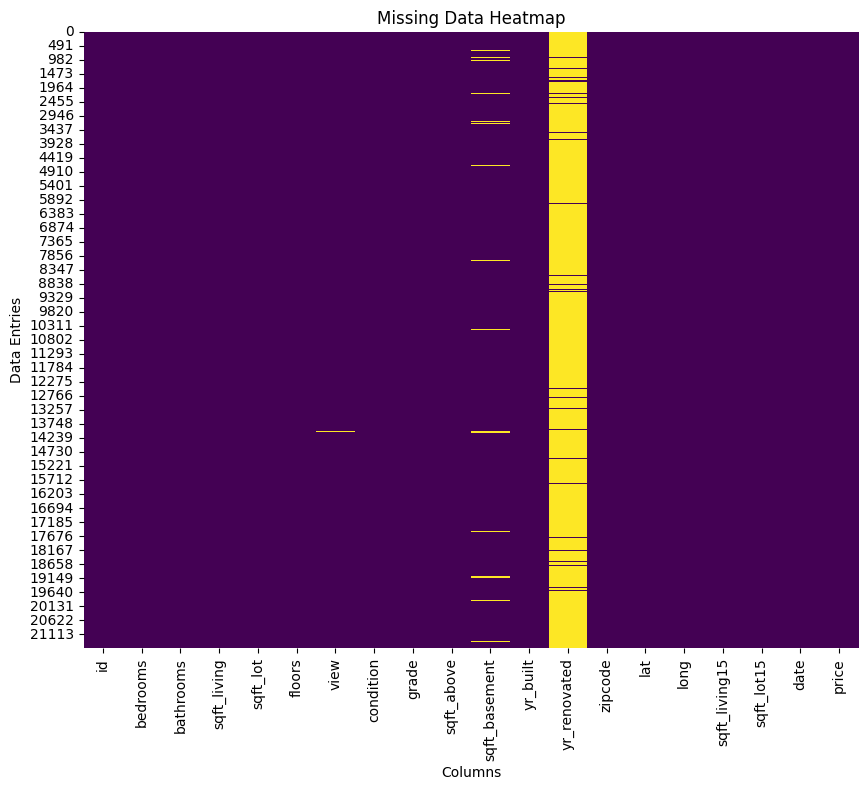

In [28]:
# Missing values are more in yr_renovated (not useful)
sns.heatmap(df_king_county.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.xlabel('Columns')
plt.ylabel('Data Entries')
plt.savefig('Missing Data Heatmap')

# Pairplt for understand the whole data

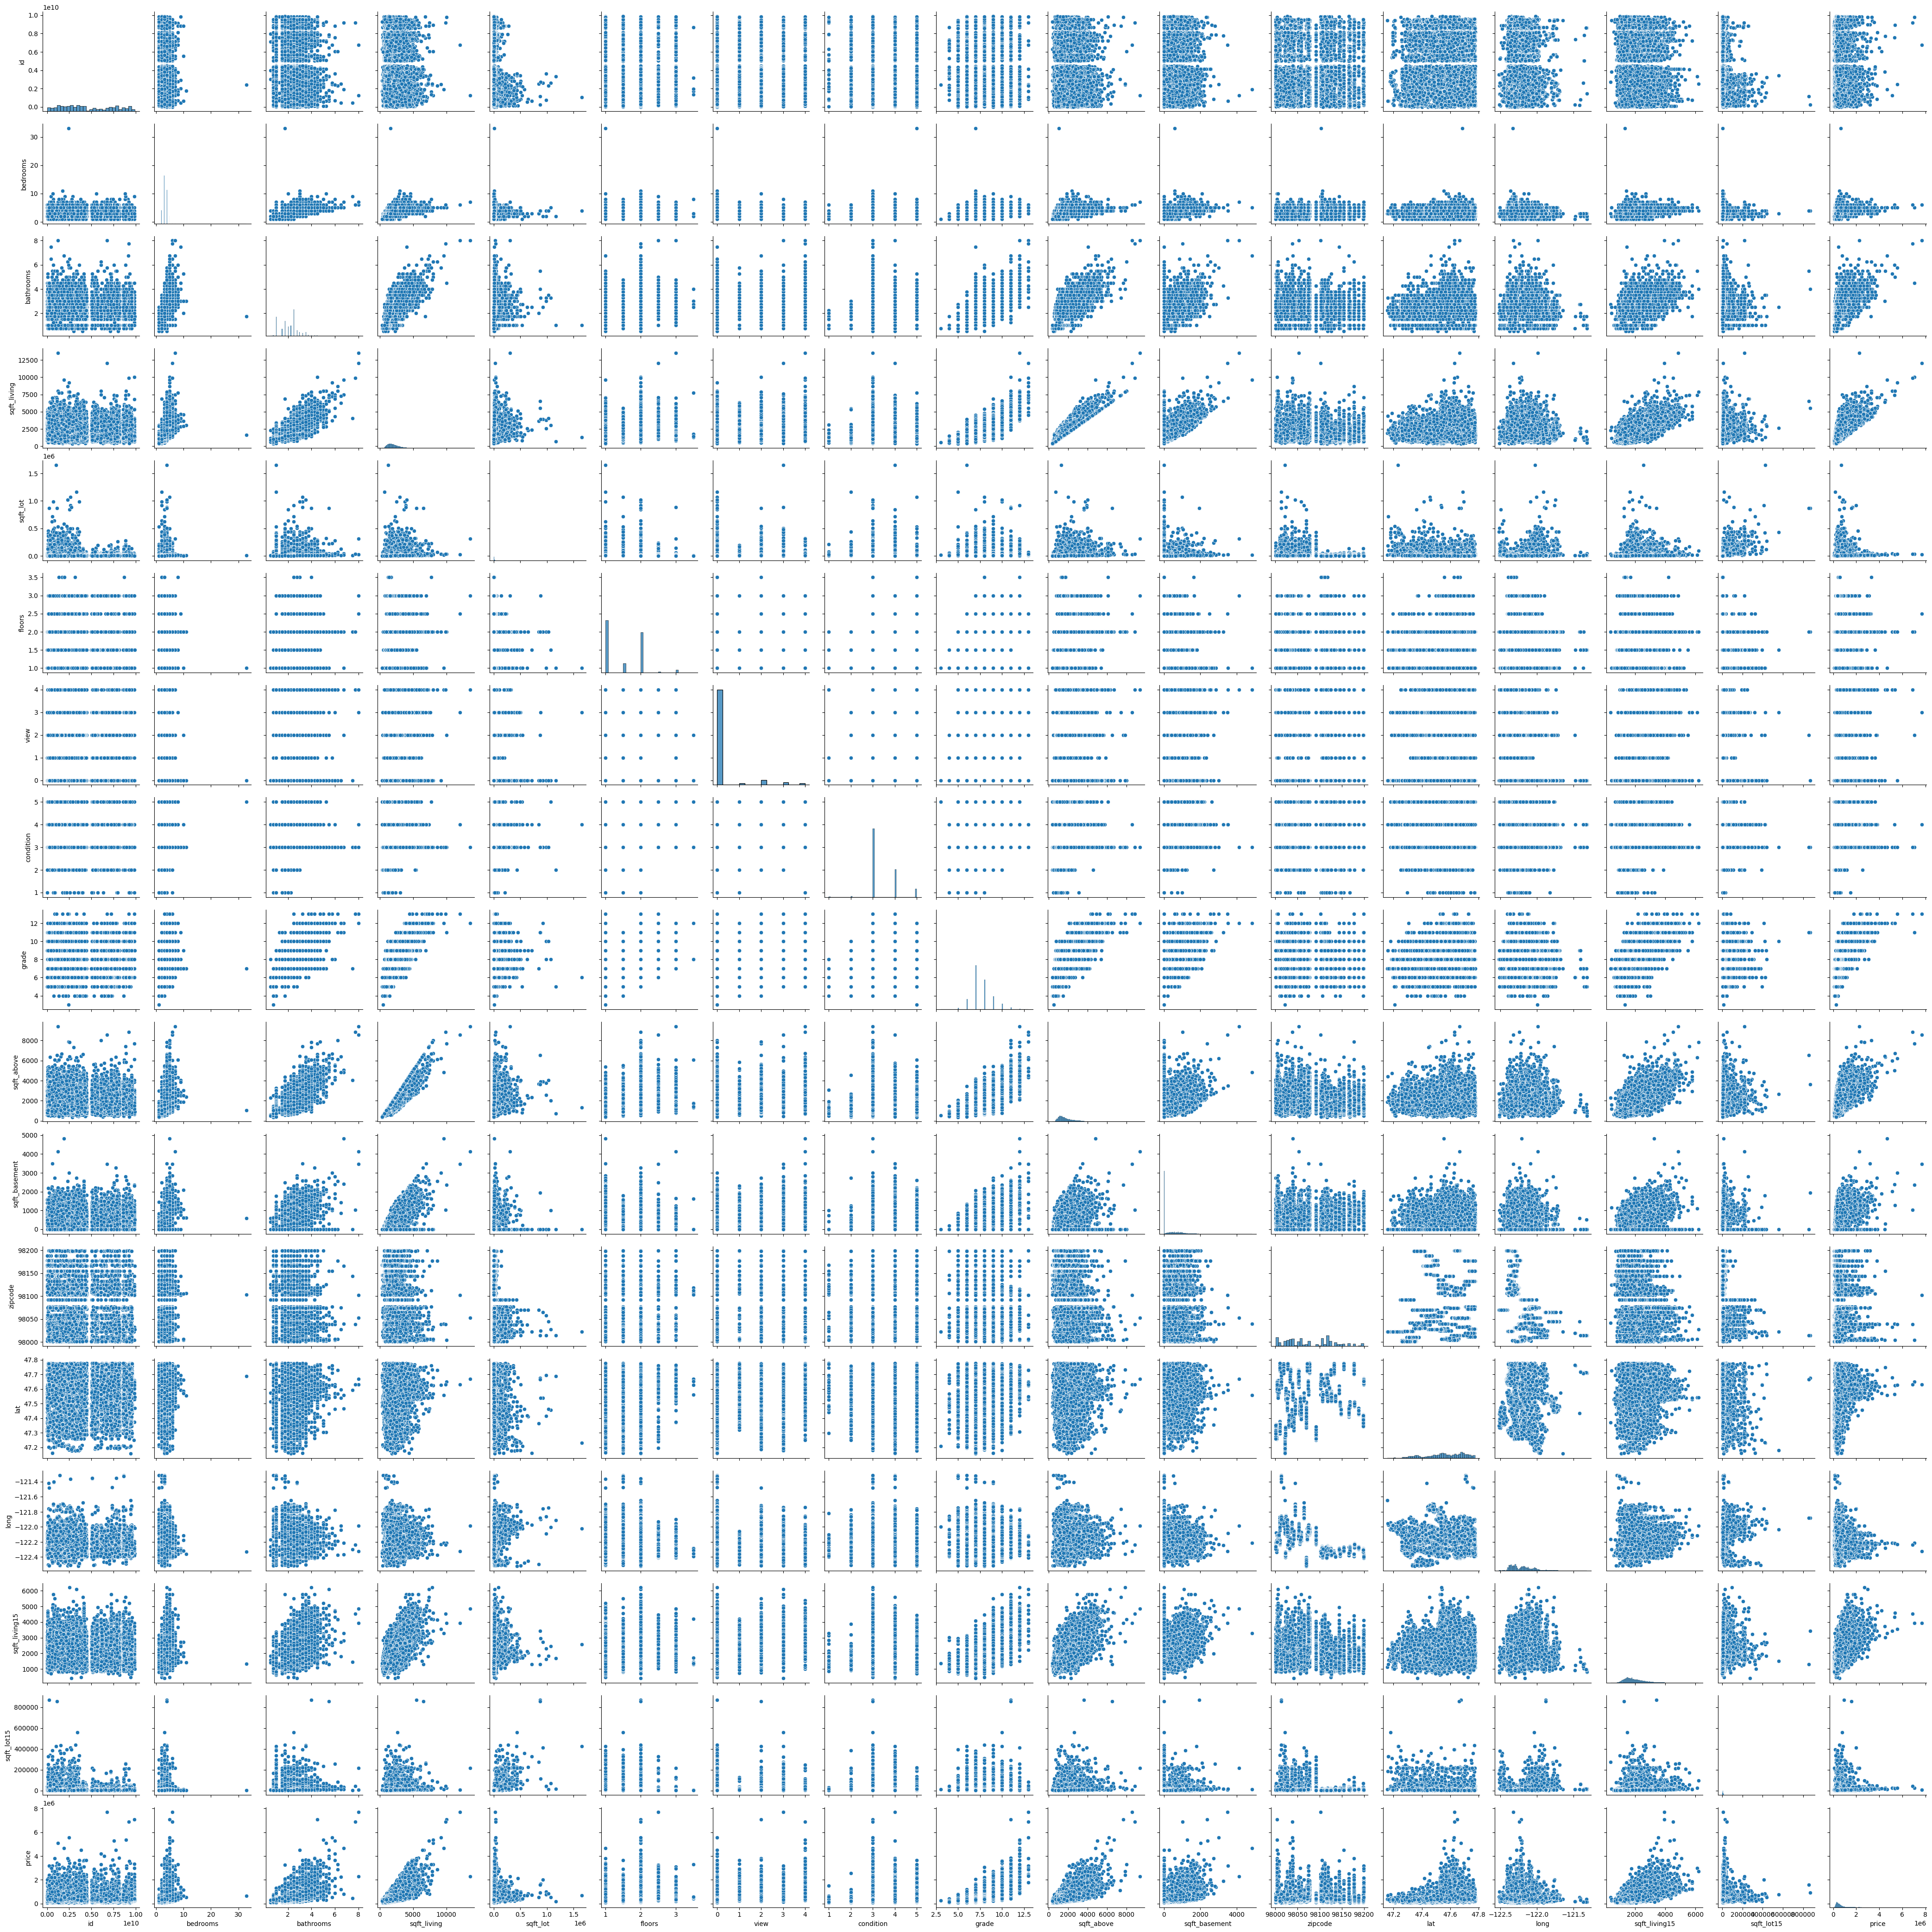

In [29]:
# Pairplt for understand the whole data
sns.pairplot(data=df_king_county)


Correlation is between -1 to 1. Near to one is positive correlation and 0 is no linear correaltion. 0.3 to 0.5 is considered as moderate correlation

In [30]:
correlation_price = df_king_county.corr()['price'].sort_values(ascending=False)
correlation_price

price            1.000
sqft_living      0.702
grade            0.668
sqft_above       0.605
sqft_living15    0.585
bathrooms        0.526
view             0.396
sqft_basement    0.325
bedrooms         0.309
lat              0.307
floors           0.257
yr_renovated     0.119
sqft_lot         0.090
sqft_lot15       0.083
yr_built         0.054
condition        0.036
long             0.022
date            -0.004
id              -0.017
zipcode         -0.053
Name: price, dtype: float64

_My hypothesis:_

1. As the years passes the price of old buildings are more or less consistent
2. As the years passes the price of Renovated buildings cost increases
3. They are less customers going for higher price houses
4. Bathrooms effect the price more than the number of bedrooms
5. Resale value of renovated house are more than the old houses.

_Solution to overview:
She wants to buy cheap old houses from poor neighborhood and renovate them with the cost cuts and sell to make little profit from it. Also, as she is being socially responsible he wants to sell the renovate for the less price than other._

Columns that I need to consider are as follows: 
Bedrooms, bathrooms, sqft_living, sqft_lot, floors, yr_built, yr_renovated, zipcode, price, date

These columns will help Erin Robinson identify and evaluate properties that align with her investment goals, especially in terms of socially responsible investing in poor neighborhoods.

# Old buildings vs Price

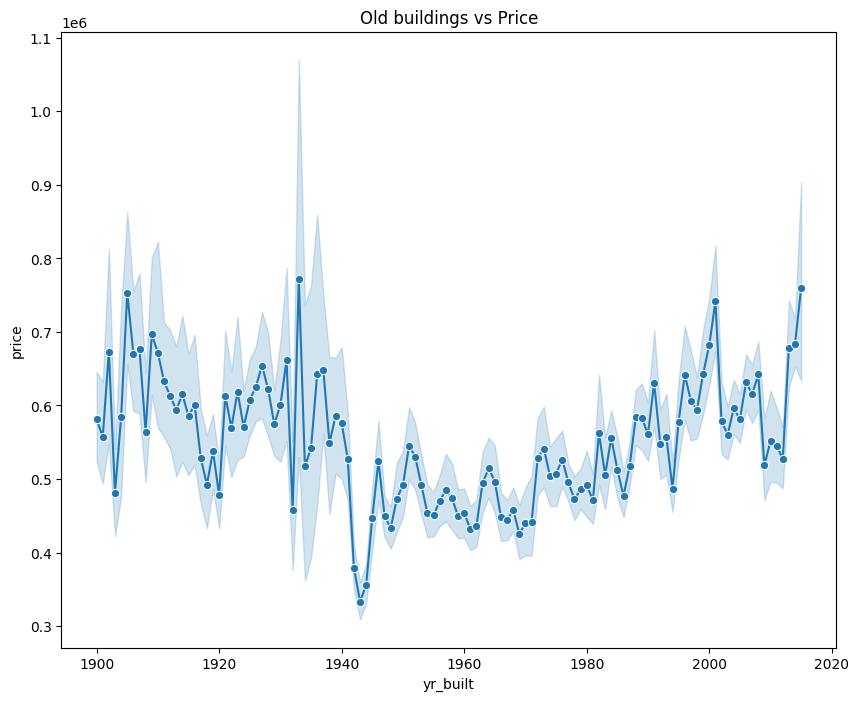

In [ ]:
# Change over time: Old buildings vs Price

sns.lineplot(data=df_king_county,x='yr_built',y='price', marker='o', linestyle='-')
plt.title('Old buildings vs Price')
plt.savefig('Old buildings vs Price')




# Renovated buildings vs Price

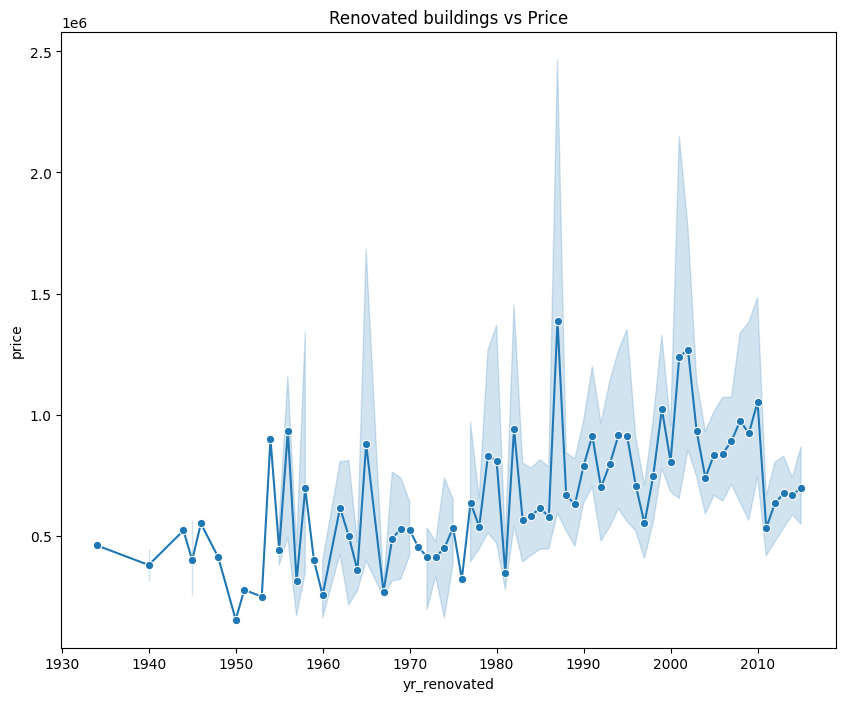

In [ ]:
# Change over time: 'Renovated buildings vs Price'
sns.lineplot(data=df_king_county,x='yr_renovated',y='price', marker='o', linestyle='-')
plt.title('Renovated buildings vs Price')
plt.savefig('Renovated buildings vs Price')

# Bedrooms

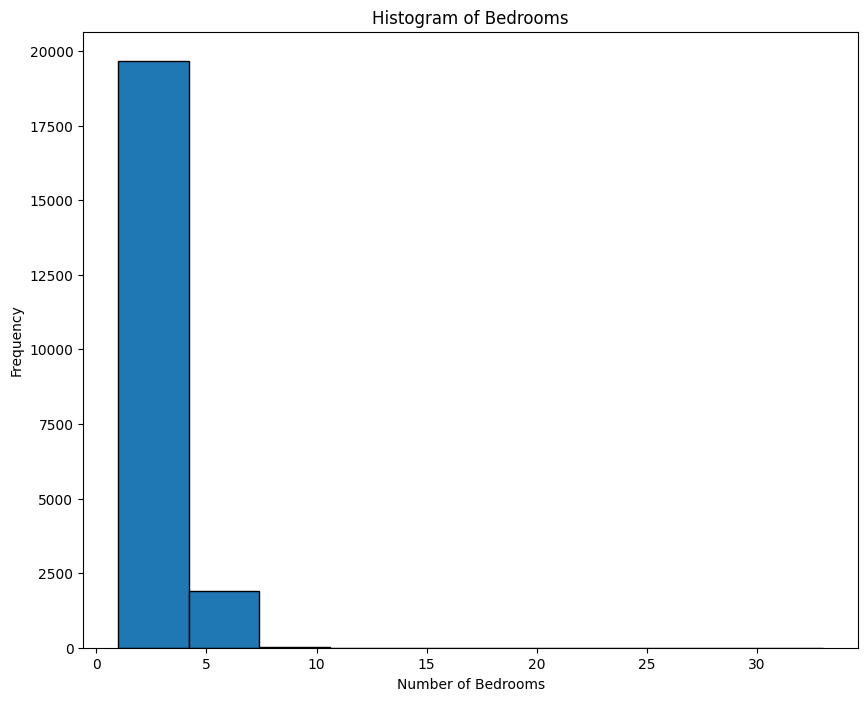

In [ ]:
# For 'bedrooms' column
plt.hist(df_king_county['bedrooms'], bins=10, edgecolor='black')
plt.title('Histogram of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.savefig('Histogram of Bedrooms')

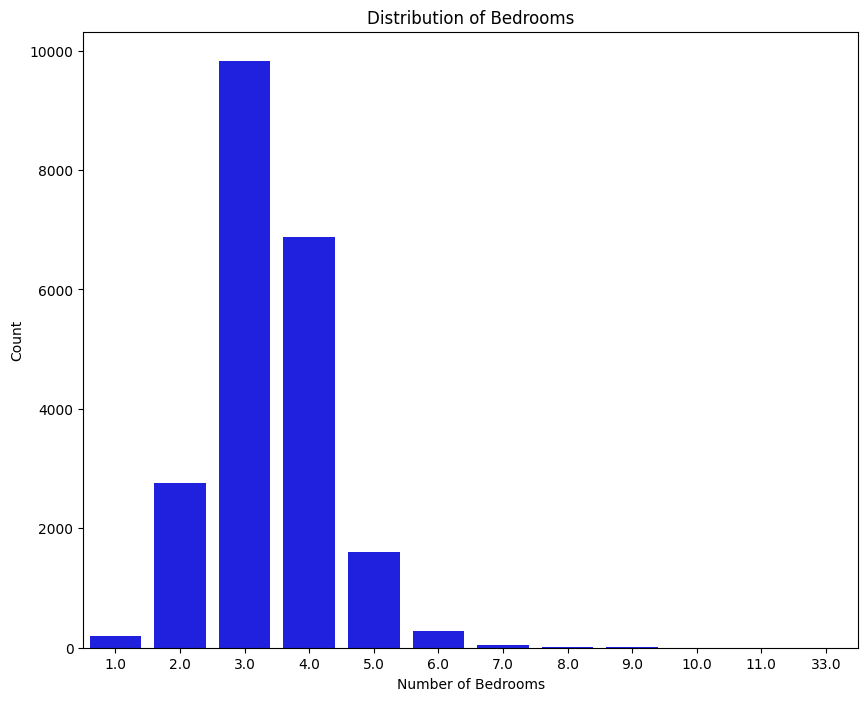

In [40]:
# For 'bedrooms' column
sns.countplot(data=df_king_county, x='bedrooms', color='blue')
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.savefig('Distribution of Bedrooms')



# Bathrooms


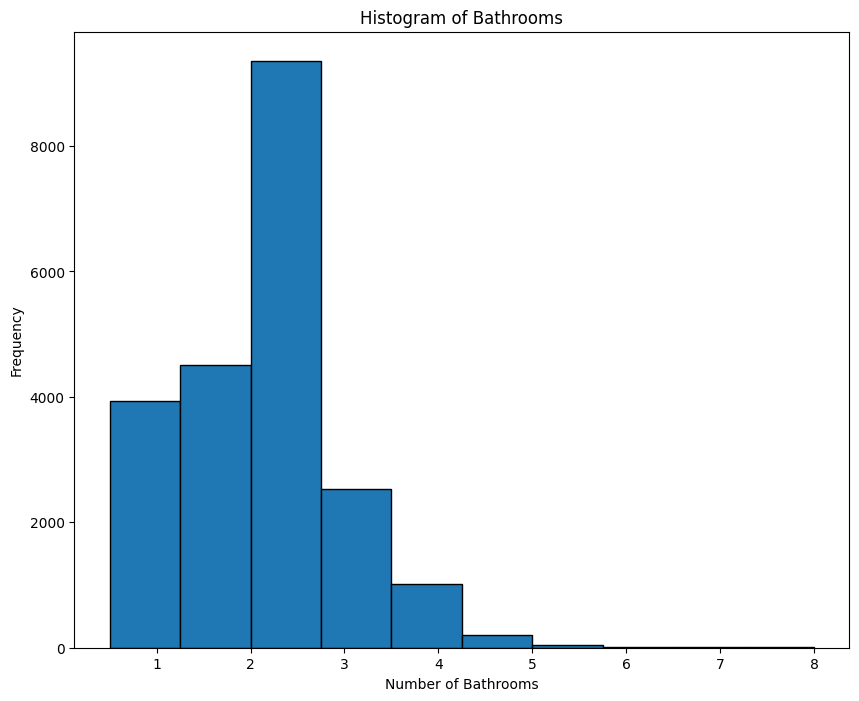

In [ ]:
# Distribution for the Bathrooms

plt.hist(df_king_county['bathrooms'],bins=10, edgecolor='black')
plt.title('Histogram of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.savefig('Histogram of Bathrooms')


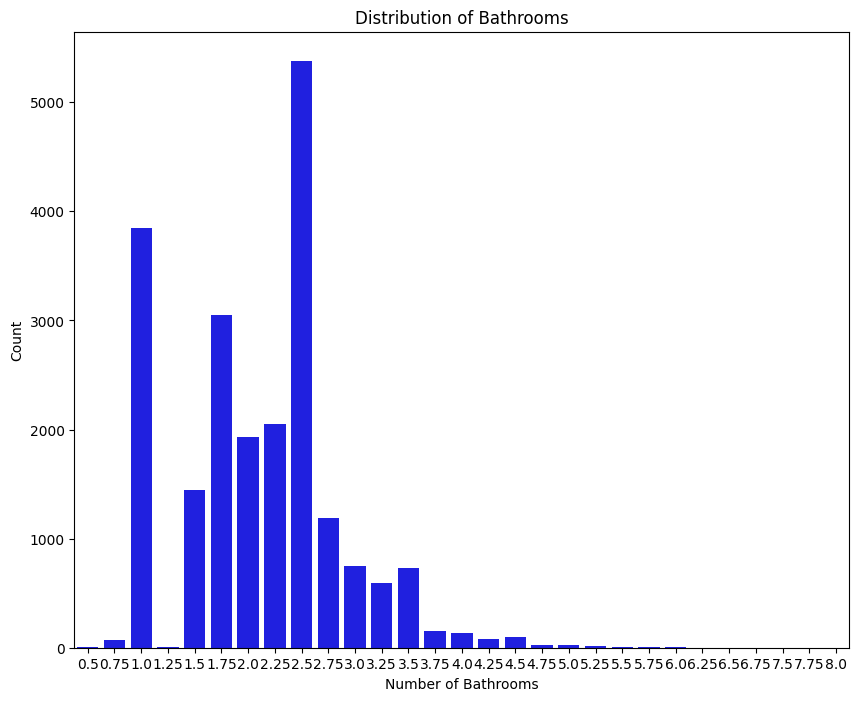

In [41]:
# For 'bathrooms' column
sns.countplot(data=df_king_county, x='bathrooms', color='blue')
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.savefig('Distribution of Bathrooms')

# Correlation between Bedrooms price and Bathroom price

In [ ]:
corr_bedrooms_price = df_king_county['bedrooms'].corr(df_king_county['price'])
corr_bathrooms_price = df_king_county['bathrooms'].corr(df_king_county['price'])

print(f'Correlation of number Bedrooms price is', corr_bedrooms_price)
print(f'Correlation of number Bathrooms price is', corr_bathrooms_price)

Correlation of number Bedrooms price is 0.30878747195653267
Correlation of number Bathrooms price is 0.5259056214532006


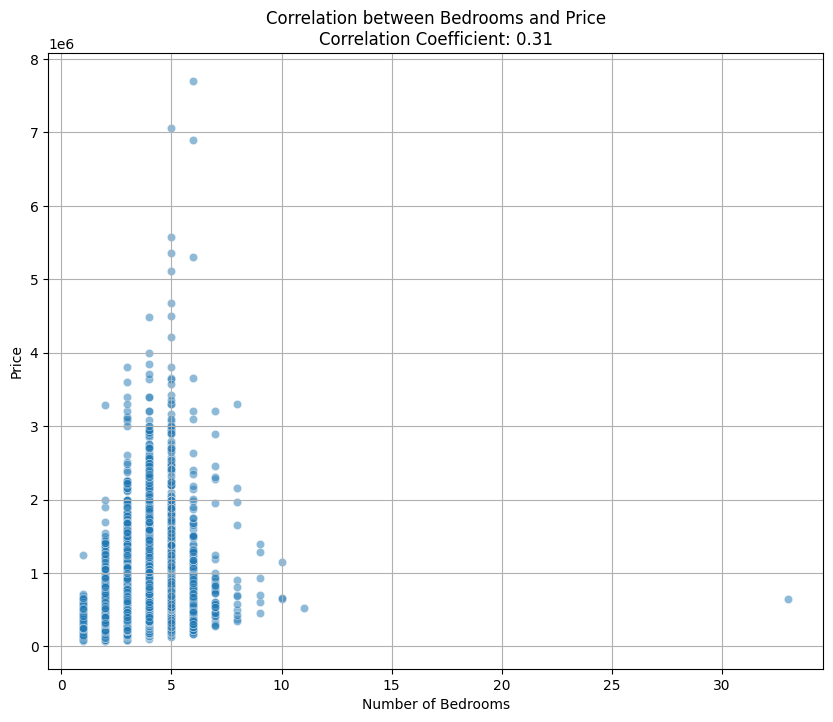

In [ ]:
# Scatterplot for correlation Bedrooms price
sns.scatterplot(data=df_king_county, x='bedrooms', y='price', alpha = 0.5)
plt.title(f'Correlation between Bedrooms and Price\nCorrelation Coefficient: {0.30878747195653267:.2f}')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('Correlation between Bedrooms and Price')

Correlation of Bedrooms with Price (0.3088):
The correlation coefficient of 0.3088 suggests a positive but relatively weak linear relationship between the number of bedrooms and the price of properties.
This positive correlation means that, on average, as the number of bedrooms in a property increases, the price of the property tends to increase. However, the correlation is not very strong, indicating that other factors likely also influence property prices.

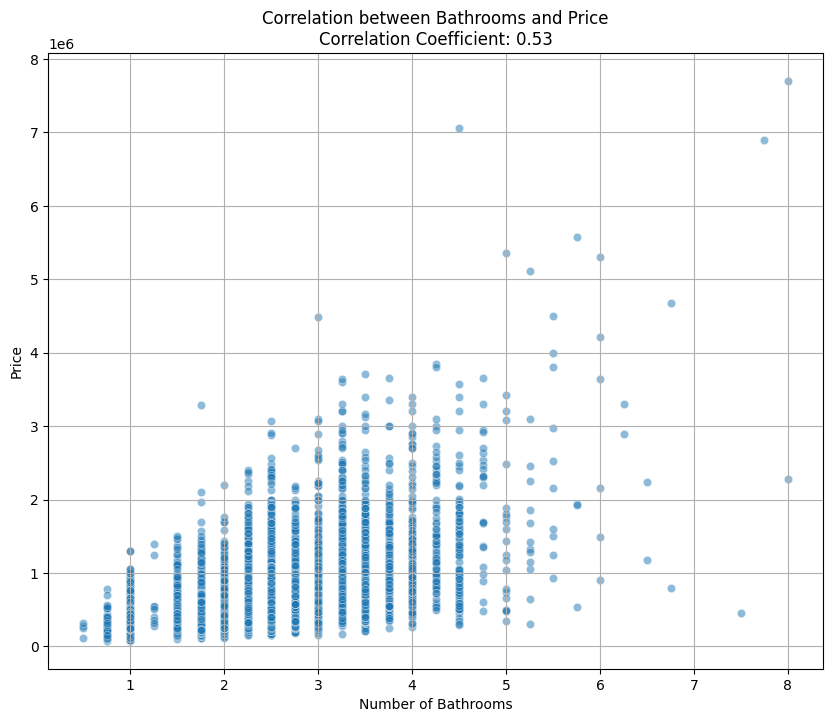

In [ ]:
# Scatter plot for 'bathrooms' vs. 'price'
sns.scatterplot(data=df_king_county, x='bathrooms', y='price', alpha = 0.5)
plt.title(f'Correlation between Bathrooms and Price\nCorrelation Coefficient: {0.5259056214532006:.2f}')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('Correlation between Bathrooms and Price')

Correlation of Bathrooms with Price (0.536):
The correlation coefficient of 0.536 indicates a stronger positive linear relationship between the number of bathrooms and the price of properties compared to bedrooms.
This suggests that, on average, as the number of bathrooms in a property increases, the price of the property tends to increase more noticeably than in the case of bedrooms.
However, it's important to note that correlation does not imply causation. A higher number of bathrooms may be associated with higher prices, but this doesn't necessarily mean that adding bathrooms directly causes property prices to rise. Other factors can also be at play.

In [ ]:
condition_king_county = df_king_county.groupby(['date','zipcode','grade','condition','price','sqft_living','sqft_above','sqft_living15','bathrooms', 'yr_built']).value_counts().reset_index()
condition_king_county.sort_values(by='price').head()

date  zipcode  grade  condition      price  sqft_living  sqft_above  \
594 2015-03-11    98001      6          3 110000.000      828.000     828.000   
17  2014-05-08    98014      7          3 134000.000      980.000     980.000   
521 2014-12-31    98023      6          3 146000.000      900.000     900.000   
624 2015-03-24    98022      6          5 152900.000      900.000     900.000   
318 2014-09-09    98014      6          3 154000.000     1040.000    1040.000   

     sqft_living15  bathrooms   yr_built  ...  bedrooms  sqft_lot  floors  \
594        828.000      1.000 1968-01-01  ...     2.000  4524.000   1.000   
17        1040.000      1.500 1922-01-01  ...     2.000  5000.000   2.000   
521        900.000      1.000 1969-01-01  ...     3.000  4770.000   1.000   
624       1290.000      1.000 1915-01-01  ...     1.000  4368.000   1.000   
318       1880.000      1.000 1949-01-01  ...     2.000 20524.000   1.000   

     view  sqft_basement  yr_renovated    lat     long  sqft_lot15  count  
594 0.000          0.000    2007-01-01 47.266 -122.244    5402.000      1  
17  0.000          0.000    2003-01-01 47.708 -121.359    5000.000      1  
521 0.000          0.000    2009-01-01 47.304 -122.362    3480.000      1  
624 0.000          0.000    1950-01-01 47.211 -121.990    5000.000      1  
318 3.000          0.000    1989-01-01 47.698 -121.875   38996.000      1  

[5 rows x 21 columns]

In [ ]:
df_king_county.describe()

id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21597.000 21597.000  21597.000    21597.000   21597.000 21597.000   
mean  4580474287.771     3.373      2.116     2080.322   15099.409     1.494   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123049175.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904930410.000     3.000      2.250     1910.000    7618.000     1.500   
75%   7308900490.000     4.000      2.500     2550.000   10685.000     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   
std   2876735715.748     0.926      0.769      918.106   41412.637     0.540   

           view  condition     grade  sqft_above  sqft_basement  \
count 21534.000  21597.000 21597.000   21597.000      21145.000   
mean      0.234      3.410     7.658    1788.597        291.857   
min       0.000      1.000     3.000     370.000          0.000   
25%       0.000      3.000     7.000    1190.000          0.000   
50%       0.000      3.000     7.000    1560.000          0.000   
75%       0.000      4.000     8.000    2210.000        560.000   
max       4.000      5.000    13.000    9410.000       4820.000   
std       0.766      0.651     1.173     827.760        442.491   

                            yr_built                   yr_renovated   zipcode  \
count                          21597                            744 21597.000   
mean   1971-01-01 00:15:16.127239876  1995-12-06 08:59:59.999999872 98077.952   
min              1900-01-01 00:00:00            1934-01-01 00:00:00 98001.000   
25%              1951-01-01 00:00:00            1987-01-01 00:00:00 98033.000   
50%              1975-01-01 00:00:00            2000-01-01 00:00:00 98065.000   
75%              1997-01-01 00:00:00            2007-04-02 06:00:00 98118.000   
max              2015-01-01 00:00:00            2015-01-01 00:00:00 98199.000   
std                              NaN                            NaN    53.513   

            lat      long  sqft_living15  sqft_lot15  \
count 21597.000 21597.000      21597.000   21597.000   
mean     47.560  -122.214       1986.620   12758.284   
min      47.156  -122.519        399.000     651.000   
25%      47.471  -122.328       1490.000    5100.000   
50%      47.572  -122.231       1840.000    7620.000   
75%      47.678  -122.125       2360.000   10083.000   
max      47.778  -121.315       6210.000  871200.000   
std       0.139     0.141        685.230   27274.442   

                                date       price  
count                          21597   21597.000  
mean   2014-10-29 04:20:38.171968512  540296.574  
min              2014-05-02 00:00:00   78000.000  
25%              2014-07-22 00:00:00  322000.000  
50%              2014-10-16 00:00:00  450000.000  
75%              2015-02-17 00:00:00  645000.000  
max              2015-05-27 00:00:00 7700000.000  
std                              NaN  367368.140

In [ ]:
df_pricegrade = df_king_county.groupby("grade").mean()['price'].reset_index()
df_pricegrade

grade       price
0       3  262000.000
1       4  212001.852
2       5  248523.971
3       6  301916.571
4       7  402594.573
5       8  542986.800
6       9  773738.222
7      10 1072347.467
8      11 1497792.378
9      12 2202528.090
10     13 3710769.231

# Avg Grade vs. Price
_If the grade increase the price also increases_

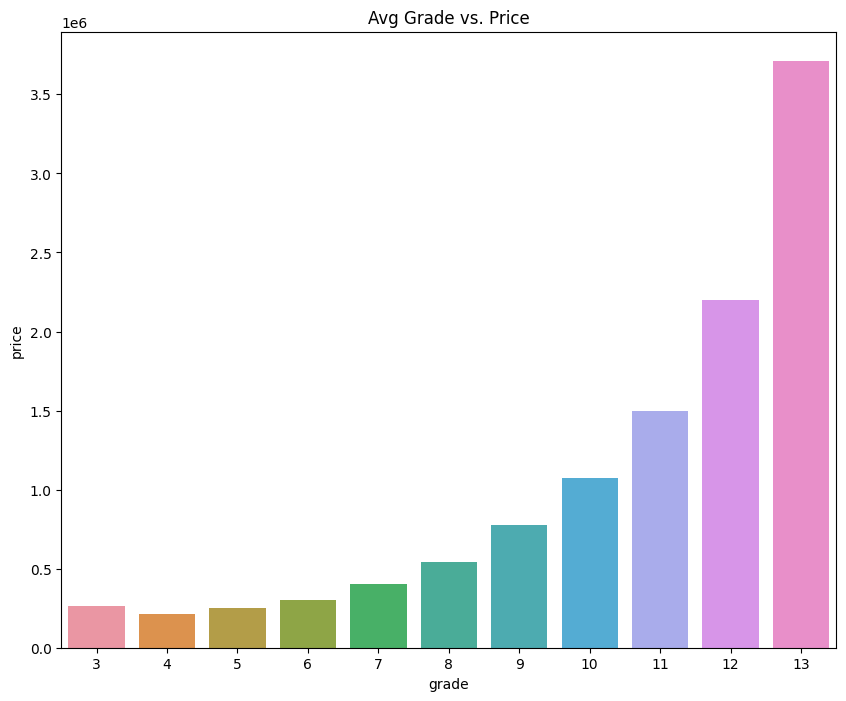

In [ ]:
sns.barplot(x='grade', y= 'price', data= df_pricegrade)
plt.title("Avg Grade vs. Price")
plt.savefig("Avg Grade vs Price")

# Avg condition vs. Price

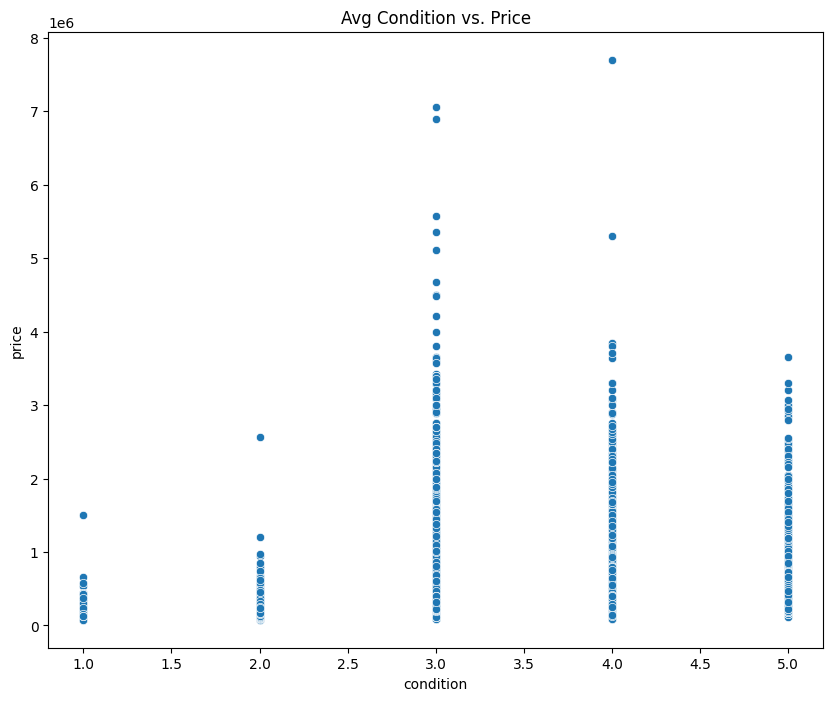

In [ ]:
sns.scatterplot(x= 'condition', y='price', data = df_king_county)
plt.title('Avg Condition vs. Price')
plt.savefig('Avg Condition vs Price')

# Grouped grade, condtions vs. price

In [ ]:
avg_grade_condition = df_king_county.groupby(['grade','condition']).mean()['price'].reset_index()
avg_grade_condition.sort_values(by= 'price').head()

grade  condition      price
1      4          1 150000.000
2      4          2 167500.000
3      4          3 205416.667
6      5          2 206166.667
4      4          4 243905.000

In [38]:
group_zipgrade = df_king_county.groupby(['grade','zipcode']).mean()['price'].reset_index()


Text(0, 0.5, 'Mean Price')

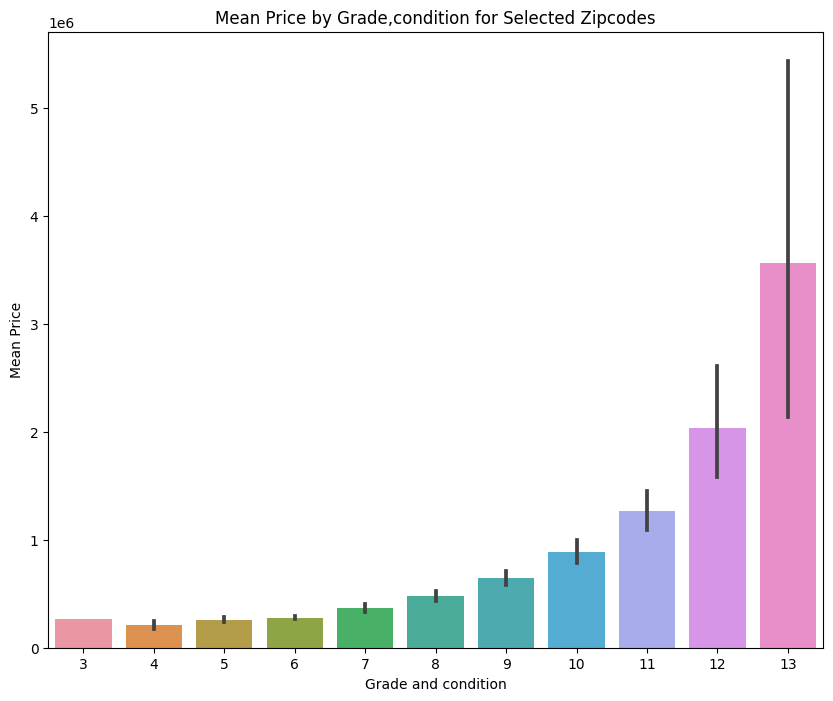

In [39]:
selected_zipcodes = [98004, 98005, 98121, 98052, 98101, 98109, 98122, 98007, 98033, 98040, 98006, 98103, 98029, 98102,
                  98074, 98107, 98112, 98115, 98105, 98008, 98075, 98119, 98116, 98144, 98053]  # Replace with actual zipcodes
selected_data = group_zipgrade[~group_zipgrade['zipcode'].isin(selected_zipcodes)]


sns.barplot(x='grade', y='price', data=selected_data)
plt.title('Mean Price by Grade,condition for Selected Zipcodes')
plt.xlabel('Grade and condition')
plt.ylabel('Mean Price')



# Avg Zipcodes and price

In [ ]:
best_zipcodes = [98004, 98005, 98121, 98052, 98101, 98109, 98122, 98007, 98033, 98040, 98006, 98103, 98029, 98102,
                  98074, 98107, 98112, 98115, 98105, 98008, 98075, 98119, 98116, 98144, 98053]

desired_zipcodes = df_king_county[~df_king_county['zipcode'].isin(best_zipcodes)]
desired_zipcodes.head()



id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  7129300520     3.000      1.000     1180.000  5650.000   1.000 0.000   
1  6414100192     3.000      2.250     2570.000  7242.000   2.000 0.000   
2  5631500400     2.000      1.000      770.000 10000.000   1.000 0.000   
3  2487200875     4.000      3.000     1960.000  5000.000   1.000 0.000   
6  1321400060     3.000      2.250     1715.000  6819.000   2.000 0.000   

   condition  grade  sqft_above  sqft_basement   yr_built yr_renovated  \
0          3      7    1180.000          0.000 1955-01-01          NaT   
1          3      7    2170.000        400.000 1951-01-01   1991-01-01   
2          3      6     770.000          0.000 1933-01-01          NaT   
3          5      7    1050.000        910.000 1965-01-01          NaT   
6          3      7    1715.000            NaN 1995-01-01          NaT   

   zipcode    lat     long  sqft_living15  sqft_lot15       date      price  
0    98178 47.511 -122.257       1340.000    5650.000 2014-10-13 221900.000  
1    98125 47.721 -122.319       1690.000    7639.000 2014-12-09 538000.000  
2    98028 47.738 -122.233       2720.000    8062.000 2015-02-25 180000.000  
3    98136 47.521 -122.393       1360.000    5000.000 2014-12-09 604000.000  
6    98003 47.310 -122.327       2238.000    6819.000 2014-06-27 257500.000

In [ ]:
# Top 5 zipcodes vs the price
zipcodes_price = desired_zipcodes.groupby('zipcode').mean()['price'].reset_index()
top_five_zipcodes = zipcodes_price.sort_values(by="price",ascending=False).head(5)
top_five_zipcodes

zipcode       price
17    98039 2161300.000
46    98199  792187.874
27    98077  682885.990
42    98177  676419.392
10    98027  617053.966

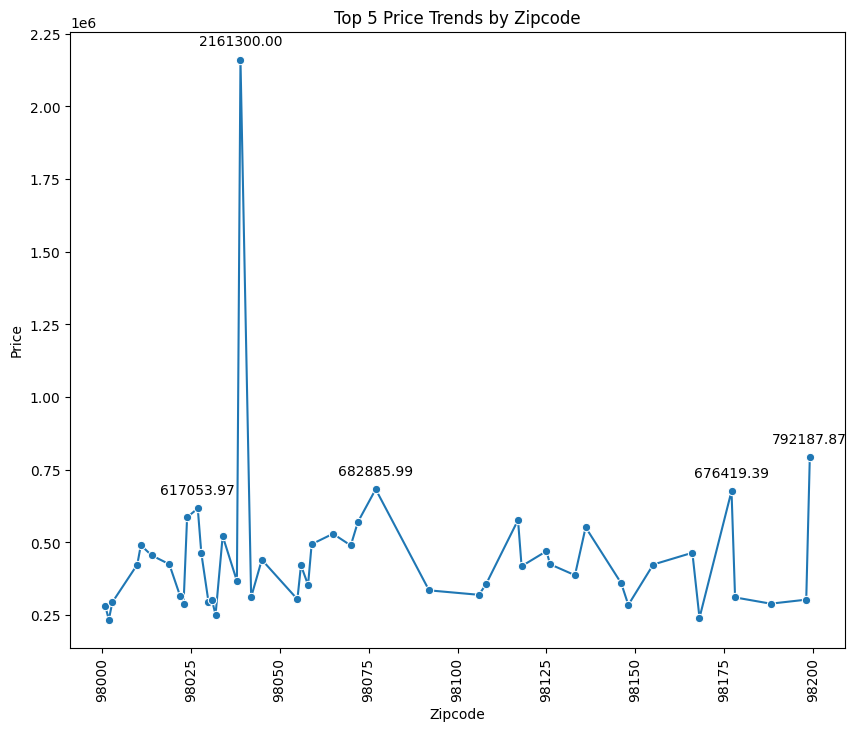

In [ ]:


sns.lineplot(x= 'zipcode', y= 'price', data= zipcodes_price, marker='o', linestyle='-')

# Annotate only the top 5
for x, y in zip(top_five_zipcodes['zipcode'], top_five_zipcodes['price']):
    plt.annotate(f'{y:.2f}', (x, y), textcoords='offset points', xytext=(0,10), ha='center')

# Set labels and title
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Top 5 Price Trends by Zipcode')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=90)

plt.savefig('Top Price Trends by Zipcode')

In [ ]:
# Least Avg zipcodes vs price
least_five_zipcodes = zipcodes_price.sort_values(by="price").head(5)
least_five_zipcodes

zipcode      price
1     98002 234284.035
41    98168 240328.372
14    98032 251296.240
0     98001 281194.870
38    98148 284908.596

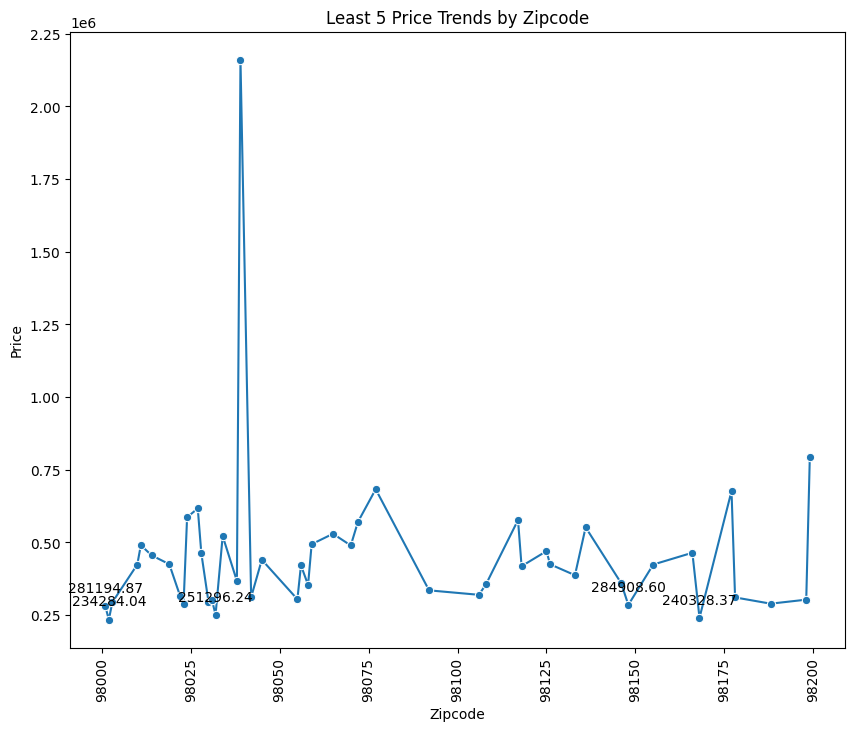

In [ ]:
sns.lineplot(x= 'zipcode', y= 'price', data= zipcodes_price, marker='o', linestyle='-')

# Annotate only the least 5
for x, y in zip(least_five_zipcodes['zipcode'], least_five_zipcodes['price']):
    plt.annotate(f'{y:.2f}', (x, y), textcoords='offset points', xytext=(0,10), ha='center')

# Set labels and title
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Least 5 Price Trends by Zipcode')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=90)
plt.savefig('Least 5 Price Trends by Zipcode')


Avg Price vs (Sqft_living vs Sqft_above vs Sqft_lot)

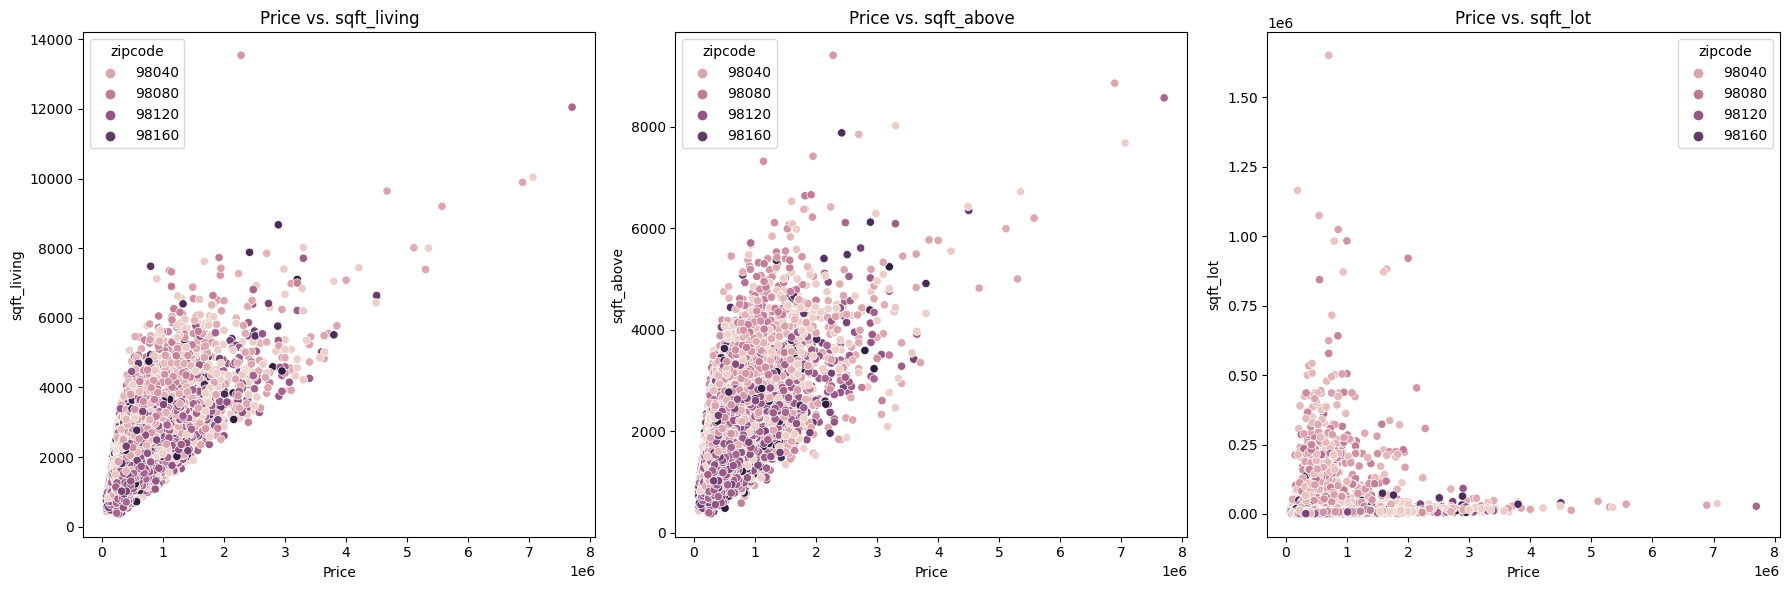

In [ ]:


# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot 1: Price vs. sqft_living with hue='zipcode'
sns.scatterplot(data=df_king_county, x='price', y='sqft_living', hue='zipcode', ax=axes[0])
axes[0].set_title('Price vs. sqft_living')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('sqft_living')

# Scatterplot 2: Price vs. sqft_above with hue='zipcode'
sns.scatterplot(data=df_king_county, x='price', y='sqft_above', hue='zipcode', ax=axes[1])
axes[1].set_title('Price vs. sqft_above')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('sqft_above')

# Scatterplot 3: Price vs. sqft_lot with hue='zipcode'
sns.scatterplot(data=df_king_county, x='price', y='sqft_lot', hue='zipcode', ax=axes[2])
axes[2].set_title('Price vs. sqft_lot')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('sqft_lot')

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig('Avg Price vs Sqft_living vs Sqft_above vs Sqft_lot')




In [ ]:
df_king_county.describe()

id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21597.000 21597.000  21597.000    21597.000   21597.000 21597.000   
mean  4580474287.771     3.373      2.116     2080.322   15099.409     1.494   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123049175.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904930410.000     3.000      2.250     1910.000    7618.000     1.500   
75%   7308900490.000     4.000      2.500     2550.000   10685.000     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   
std   2876735715.748     0.926      0.769      918.106   41412.637     0.540   

           view  condition     grade  sqft_above  sqft_basement  \
count 21534.000  21597.000 21597.000   21597.000      21145.000   
mean      0.234      3.410     7.658    1788.597        291.857   
min       0.000      1.000     3.000     370.000          0.000   
25%       0.000      3.000     7.000    1190.000          0.000   
50%       0.000      3.000     7.000    1560.000          0.000   
75%       0.000      4.000     8.000    2210.000        560.000   
max       4.000      5.000    13.000    9410.000       4820.000   
std       0.766      0.651     1.173     827.760        442.491   

                            yr_built                   yr_renovated   zipcode  \
count                          21597                            744 21597.000   
mean   1971-01-01 00:15:16.127239876  1995-12-06 08:59:59.999999872 98077.952   
min              1900-01-01 00:00:00            1934-01-01 00:00:00 98001.000   
25%              1951-01-01 00:00:00            1987-01-01 00:00:00 98033.000   
50%              1975-01-01 00:00:00            2000-01-01 00:00:00 98065.000   
75%              1997-01-01 00:00:00            2007-04-02 06:00:00 98118.000   
max              2015-01-01 00:00:00            2015-01-01 00:00:00 98199.000   
std                              NaN                            NaN    53.513   

            lat      long  sqft_living15  sqft_lot15  \
count 21597.000 21597.000      21597.000   21597.000   
mean     47.560  -122.214       1986.620   12758.284   
min      47.156  -122.519        399.000     651.000   
25%      47.471  -122.328       1490.000    5100.000   
50%      47.572  -122.231       1840.000    7620.000   
75%      47.678  -122.125       2360.000   10083.000   
max      47.778  -121.315       6210.000  871200.000   
std       0.139     0.141        685.230   27274.442   

                                date       price  
count                          21597   21597.000  
mean   2014-10-29 04:20:38.171968512  540296.574  
min              2014-05-02 00:00:00   78000.000  
25%              2014-07-22 00:00:00  322000.000  
50%              2014-10-16 00:00:00  450000.000  
75%              2015-02-17 00:00:00  645000.000  
max              2015-05-27 00:00:00 7700000.000  
std                              NaN  367368.140

In [ ]:
low_price_range = df_king_county[df_king_county['price'] < 540296.574]
medium_price_range = df_king_county[(df_king_county['price'] >= 78000.000) & (df_king_county['price'] < 7700000.000)]
high_price_range = df_king_county[df_king_county['price'] >= 540296.574]


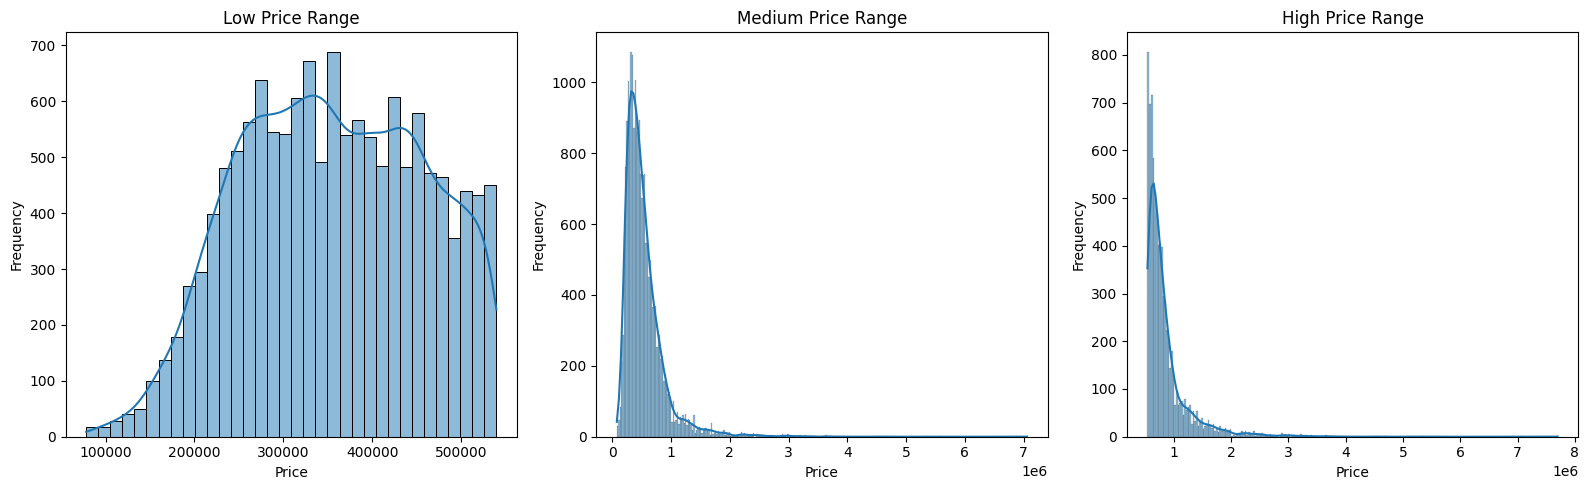

In [ ]:
# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot for 'low_price_range'
sns.histplot(data=low_price_range, x='price', kde=True, ax=axes[0])
axes[0].set_title('Low Price Range')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot for 'medium_price_range'
sns.histplot(data=medium_price_range, x='price', kde=True, ax=axes[1])
axes[1].set_title('Medium Price Range')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

# Plot for 'high_price_range'
sns.histplot(data=high_price_range, x='price', kde=True, ax=axes[2])
axes[2].set_title('High Price Range')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

plt.tight_layout()

Symmetric Distribution: In a symmetric distribution, the KDE curve is centered around the mean of the data. The histogram bars are relatively uniform and follow the curve's shape. There may be one or more peaks depending on the data.

Skewed Distribution: In a skewed distribution, the KDE curve is not centered. It may be shifted towards the left (negatively skewed) or right (positively skewed). The histogram bars follow the skewness, being more concentrated on one side.

Bimodal Distribution: If there are multiple peaks in the KDE curve, it indicates a bimodal or multimodal distribution, suggesting that the data has multiple clusters or modes.

Outliers: Outliers may appear as isolated spikes in the KDE curve, indicating data points that significantly deviate from the main distribution.

In [ ]:




# Create a scattermapbox plot
fig = px.scatter_mapbox(
    desired_zipcodes,
    lat='lat',     # Latitude column
    lon='long',    # Longitude column
    color='grade',  # Color points by grade
    hover_name='price',  # Display price on hover
    size='price',   # Size points by price
    zoom=10,         # Adjust the initial zoom level
    mapbox_style='carto-positron',  # Map style
    title='Grade vs. Price in Desired Zipcodes'
)


fig.update_traces(marker=dict(sizemode='diameter', opacity=0.7))


# Set the figure size
fig.update_layout(
    width=1000,  # Set the width to 1000 pixels
    height=800   # Set the height to 800 pixels
)


